# Finding Bayesian Experimental Design for Nonlinear Mixed-Effects Models with Application to HIV Dynamics

The following work is mainly based on the paper "Bayesian Experimental Design for Nonlinear Mixed-Effects Models with Application to HIV Dynamics", by Cong Han and Kathryn Chaloner, 2004.

### Introduction 

Consider the following nonlinear mixed-effects model for HIV dynamics under protease inhibitor monotherapy (Perelson et al., 1996; Han et al., 2002). For subjects $i = 1, \cdots, n$, assume the observations for the $i$-th subject  $\mathbf{y}_i = (y_{i1}, \cdots, y_{im})'$ have the distribution

$$y_{ij}|\boldsymbol{\theta}_i, t_j, \sigma^2 \sim \mathcal{N}(s(\boldsymbol{\theta}_i, t_j), \sigma^2),\; j=1,\cdots, m,$$

where 

$$s(\boldsymbol{\theta}_i, t_j) = \theta_{i1} + \log[\frac{e^{2\theta_{i2}-e^{\theta_{i3}}t_j}}{(e^{\theta_{i2}}-e^{\theta_{i3}})^2}-\frac{e^{2\theta_{i2}}-(e^{\theta_{i2}}-e^{\theta_{i3}})^2}{(e^{\theta_{i2}}-e^{\theta_{i3}})^2}e^{-e^{\theta_{i2}}t_j} - \frac{e^{\theta_{i2}+\theta_{i3}}t_j}{e^{\theta_{i2}}-e^{\theta_{i3}}}e^{-e^{\theta_{i2}}t_j}].$$

For subject $i$, $y_{ij}$ is the natural logarithm of the plasma concentration of HIV particles at time $t_j$ after the pharmacologic delay of the drug effect; $e^{\theta_{i1}}$ is the plasma concentration of HIV particles at treatment initiation; $e^{\theta_{i2}}$ is the virion clearance rate; and $e^{\theta_{i3}}$ is the rate at which the infected CD4 cells die. The expression $s(\boldsymbol{\theta}_i, t_j) $ is obtained by solving a system of differential equations that describe the transactions among virus particles, target cells, and infected cells. Details of mathematical modeling of HIV dynamics can be found in Nowak and May (2000, Chapter 4) and Perelson and Nelson (1999). The primary interest is in $\theta_{i2}$ and $\theta_{i3}$, the population values of the logarithm of the virion clearance rate and rate of disappearance of infected CD4 cells.

There are $m$ measurements taken on each of $n$ subjects, at time points $t_1, \cdots, t_m$. The $\boldsymbol{\theta}_i$'s are 3-dimensional random effects. 


### Model

In data analysis, the following hierarchical modelling structure has been proposed for parameters:

$$\boldsymbol{\theta}_i|\boldsymbol{\mu}, \boldsymbol{\Sigma} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}),$$

$$\sigma^{-2} \sim \mathcal{G}(\alpha, \beta), $$

$$\boldsymbol{\mu} \sim \mathcal{N}(\boldsymbol{\eta}, \boldsymbol{\Lambda}),$$

$$\boldsymbol{\Sigma}^{-1} \sim \mathcal{W}(\boldsymbol{\Omega}, \gamma).$$

Details of the construction of the prior distribution are given in Han et al. (2002).

### Objective 

The interest is to find the Bayesian optimal design $\mathbf{t}$ that minimizes $\mathbf{E}[\mathbf{Var}(\mu_{i2}|y)]$ or $\mathbf{E}[\mathbf{Var}(\mu_{i3}|y)]$.

### Previous Work

In Han's paper, they evaluated 8 designs (Table 1 in that paper) under two prior setups $\pi_1$ and $\pi_2$ and selected the best one as the Bayesian optimal design.

$\pi_1$:

$$\sigma^{-2} \sim \mathcal{G}(4.5, 9.0), $$

$$\boldsymbol{\mu} \sim \mathcal{N}((11.0, 1.1, -1.0)', \text{diag}(6.0, 0.1, 0.01)),$$

$$\boldsymbol{\Sigma}^{-1} \sim \mathcal{W}(\text{diag}(0.26, 2.5, 2.5), 3.0);$$

$\pi_2$:

$$\sigma^{-2} \sim \mathcal{G}(81.0, 0.5), $$

$$\boldsymbol{\mu} \sim \mathcal{N}((11.0, 1.1, -1.0)', \text{diag}(0.6, 0.01, 0.001)),$$

$$\boldsymbol{\Sigma}^{-1} \sim \mathcal{W}(\text{diag}(0.0078, 0.075, 0.075), 100.0).$$

#### The weakness of their paper is that they did not provide a method to actually find the Bayesian optimal design but only considered designs from a relatively small-sized design pool. 

The difficulty of this problem is that some priors are not conjugate and thus $f(\boldsymbol{\mu}|y)$ does not have an explict functional form. Since finding the Bayesian optimal design is an optimization problem, every time we change the content of $\mathbf{t}$, the sampling schema changes, so does the real-time objective function.

Sampling is very time-consuming and sophisticated especially for models with such a complex structure.

Therefore in the process of searching these Bayesian optimal designs, we should try to avoid unnecessary sampling steps. For instance, because we are interesed in finding $f(\boldsymbol{\mu}|y)$ and we know $f(\boldsymbol{\mu}|y) = \frac{f(y|\boldsymbol{\mu})f(\boldsymbol{\mu})}{f(y)}$, where the marginal distribution of $y$ would not affect the solution, we may skip the procedure figuring out $f(y)$.

### Math Work and Programming Plan


Since 

$$\mathbf{E}[\mathbf{Var}(\mu_{i2}|y)] = \mathbf{E}(\mu_{i2}^2) - \mathbf{E}[\mathbf{E}^2(\mu_{i2}|y)],$$

the first term is a constant which can be ignored.

Note that 
$$\mathbf{E}(\mu_{i2}|y) \propto \int \mu_{i2} f(y|\boldsymbol{\mu}_i,\boldsymbol{\Sigma}^{-1}_i, \sigma_i^{-2}) f(\boldsymbol{\mu}_i,\boldsymbol{\Sigma}^{-1}_i, \sigma_i^{-2})d\boldsymbol{\mu}_id\boldsymbol{\Sigma}^{-1}_id\sigma^{-2}.$$

#### 1.

We know that

$$f(y|\boldsymbol{\mu}, \boldsymbol{\Sigma}^{-1}, \sigma^{-2}) = \int f(y|\boldsymbol{\theta}_i, \sigma^{-2})f(\boldsymbol{\theta}_i|\boldsymbol{\mu}, \boldsymbol{\Sigma})d\boldsymbol{\theta}_i.$$

We define a function $F_1$($\mathbf{t}$, $y$, $\boldsymbol{\mu}$, $\boldsymbol{\Sigma}^{-1}$, $\sigma^2$, $k$) to calculate $f(y|\mathbf{\mu}, \boldsymbol{\Sigma}^{-1}, \sigma^2)$.

Input:

$\tiny\bullet$ $\mathbf{t}$: a $1\times m$ vector represent $m$ selected time points;

$\tiny\bullet$ $y$: a scalar;

$\tiny\bullet$ $\boldsymbol{\mu}$: a $1\times 3$ vector;

$\tiny\bullet$ $\boldsymbol{\Sigma}^{-1}$: a $3\times 3$ matrix for generating $\boldsymbol{\theta}$ (inverse of  $\boldsymbol{\Sigma}$); 

$\tiny\bullet$ $\sigma^2$: a scalar working as the variance for generating $y$;

$\tiny\bullet$ $k$: the sampling size for  $\boldsymbol{\theta}$.

Randomly sample $\boldsymbol{\theta}_1, \;\cdots, \;\boldsymbol{\theta}_{k}$.

 

$$\begin{equation} 
\begin{split}
f(y|\mathbf{\mu}, \boldsymbol{\Sigma}^{-1}, \sigma^2)&\approx\sum_{i=1}^{k}\sum_{j=1}^m\frac{f(y|\boldsymbol{\theta}_i, \mathbf{t}_j, \sigma^2)f(\boldsymbol{\theta}_i|\boldsymbol{\mu}, \boldsymbol{\Sigma}^{-1})}{km} \\ 
&= \sum_{i=1}^{k}\sum_{j=1}^m\frac{\frac{1}{\sqrt{2\pi}\sigma}\exp\{-\frac{[y-s(\boldsymbol{\theta}_i, \mathbf{t}_j)]^2}{2\sigma^2}\}\frac{1}{\sqrt{2\pi}^3\sqrt{|\boldsymbol{\Sigma}|}}\exp\{-\frac{1}{2}(\boldsymbol{\theta}_i-\boldsymbol{\mu})\boldsymbol{\Sigma}^{-1}(\boldsymbol{\theta}_i-\boldsymbol{\mu})'\}}{km} \\
&= \frac{1}{(2\pi)^2\sigma\sqrt{|\boldsymbol{\Sigma}|}km}\sum_{i=1}^{k}\sum_{j=1}^m\exp\{-\frac{[y-s(\boldsymbol{\theta}_i, \mathbf{t}_j)]^2}{2\sigma^2}-\frac{1}{2}(\boldsymbol{\theta}_i-\boldsymbol{\mu})\boldsymbol{\Sigma}^{-1}(\boldsymbol{\theta}_i-\boldsymbol{\mu})'\} \\
\end{split}
\end{equation}$$


#### 2. 



Define a function $F_2$($\mathbf{t}$, $y$, $k$, $\boldsymbol{\Omega}$, $\gamma$, $\boldsymbol{\eta}$, $\boldsymbol{\Lambda}$, $\alpha$, $\beta$, $ss$) to calculate $\mathbf{E}^2(\mu_{i2}|y)$. 



Input:

$\tiny\bullet$ $\mathbf{t}$: a $1\times n$ vector represent $n$ selected time points (pass to $F_1$);

$\tiny\bullet$ $y$: a scalar (pass to $F_1$);

$\tiny\bullet$ $k$: the sampling size for  $\boldsymbol{\theta}$ (pass to $F_1$);

$\tiny\bullet$ $\boldsymbol{\Omega}$: a $3\times 3$ matrix for generating $\boldsymbol{\Sigma}^{-1}$;

$\tiny\bullet$ $\gamma$: a scalar for generating $\boldsymbol{\Sigma}^{-1}$;

$\tiny\bullet$ $\boldsymbol{\eta}$: a $1\times 3$ mean vector for generating $\boldsymbol{\mu}$;

$\tiny\bullet$ $\boldsymbol{\Lambda}$: a $3\times 3$ covariance matrix for generating $\boldsymbol{\mu}$; 

$\tiny\bullet$ $\alpha$: a scalar for generating $\sigma^{-2}$;

$\tiny\bullet$ $\beta$: a scalar for generating $\sigma^{-2}$;

$\tiny\bullet$ $ss$: the sampling size for the hyperparameters.

We generate a sequence of $(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}^{-1}_1, \sigma^{-2}_1), \;\cdots, \;(\boldsymbol{\mu}_{ss}, \boldsymbol{\Sigma}^{-1}_{ss}, \sigma^{-2}_{ss})$



$$\begin{equation} 
\begin{split}
\mathbf{E}(\mu_{i2}|y)&\propto\sum_{i=1}^{ss}\frac{F_1(y, \mathbf{t}, \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i, \sigma^2_i, k)f(\boldsymbol{\mu}_i,\boldsymbol{\Sigma}^{-1}_i, \sigma_i^{-2})\mu_{i2}}{ss}, 
\end{split}
\end{equation}$$

$$f(\boldsymbol{\mu}_i,\boldsymbol{\Sigma}^{-1}_i, \sigma_i^{-2}) = \frac{1}{\sqrt{2\pi}^3\sqrt{|\boldsymbol{\Lambda}|}}\exp[-\frac{1}{2}(\boldsymbol{\mu}_i - \boldsymbol{\eta})\boldsymbol{\Lambda}^{-1}(\boldsymbol{\mu}_i - \boldsymbol{\eta})']\frac{|\boldsymbol{\Sigma}^{-1}|^{\frac{\gamma-3-1}{2}}\exp[-tr(\boldsymbol{\Omega}^{-1}\boldsymbol{\Sigma}^{-1})/2]}{2^{\frac{3\gamma}{2}}|\boldsymbol{\Omega}|^{\frac{\gamma}{2}}\Gamma_3(\frac{\gamma}{2})}\frac{\beta^\alpha}{\Gamma(\alpha)}(\sigma^{-2})^{\alpha-1}\exp(-\beta\sigma^{-2}),$$

where

$$\Gamma_3(\frac{\gamma}{2}) = \pi^{1.5}\Gamma(\frac{\gamma}{2})\Gamma(\frac{\gamma}{2}-0.5)\Gamma(\frac{\gamma}{2}-1).$$

#### 3.

Define a function $F_3(t, \mathbf{y}, k, ss, \cdots)$ to calculate $\mathbf{E}[\mathbf{E}^2(\mu_{i2}|y)]$ that we aim to maximize over $\mathbf{t}$. 

Input 

$\tiny\bullet$ $\mathbf{y}$: a sequence of observation $y$.

$$\begin{equation} 
\begin{split}
\mathbf{E}[\mathbf{E}^2(\mu_{i2}|y)]&\approx \sum^S_{i=1}\frac{F^2_2(y_i,\cdots)}{S}
\end{split}
\end{equation}$$



### Algorithm

Step 1. We start with a sequence of random $y$, say, generated uniformly from -10 to 10.

Step 2. Given the initial $\mathbf{y}$, we apply CSO-MA to find the optimal $\mathbf{t}$.

Step 3. Given the optimal $\mathbf{t}$ we obtain in Step 2, we resample $\mathbf{y}$.

Step 4. Iterate Step 2 and 3 until some stopping criterion is met. 

### A Simulation

We here try to find the Bayesian optimal design under prior setup $\pi_1$ that proposed in Han's paper. For illustration purpose, we set $m=2$ and time bound is $[0, 10]$.

Other parameters: $k=50$, $ss=90$, sampling size for $\mathbf{y}$ is 200.

Parameters in CSO-MA: swarmsize = 20, max_iteration = 50, $\phi=0$.

#### From the figure below, we can find that optimal $t_{i1}, t_{i2}$ indeed converge to some fixed values.

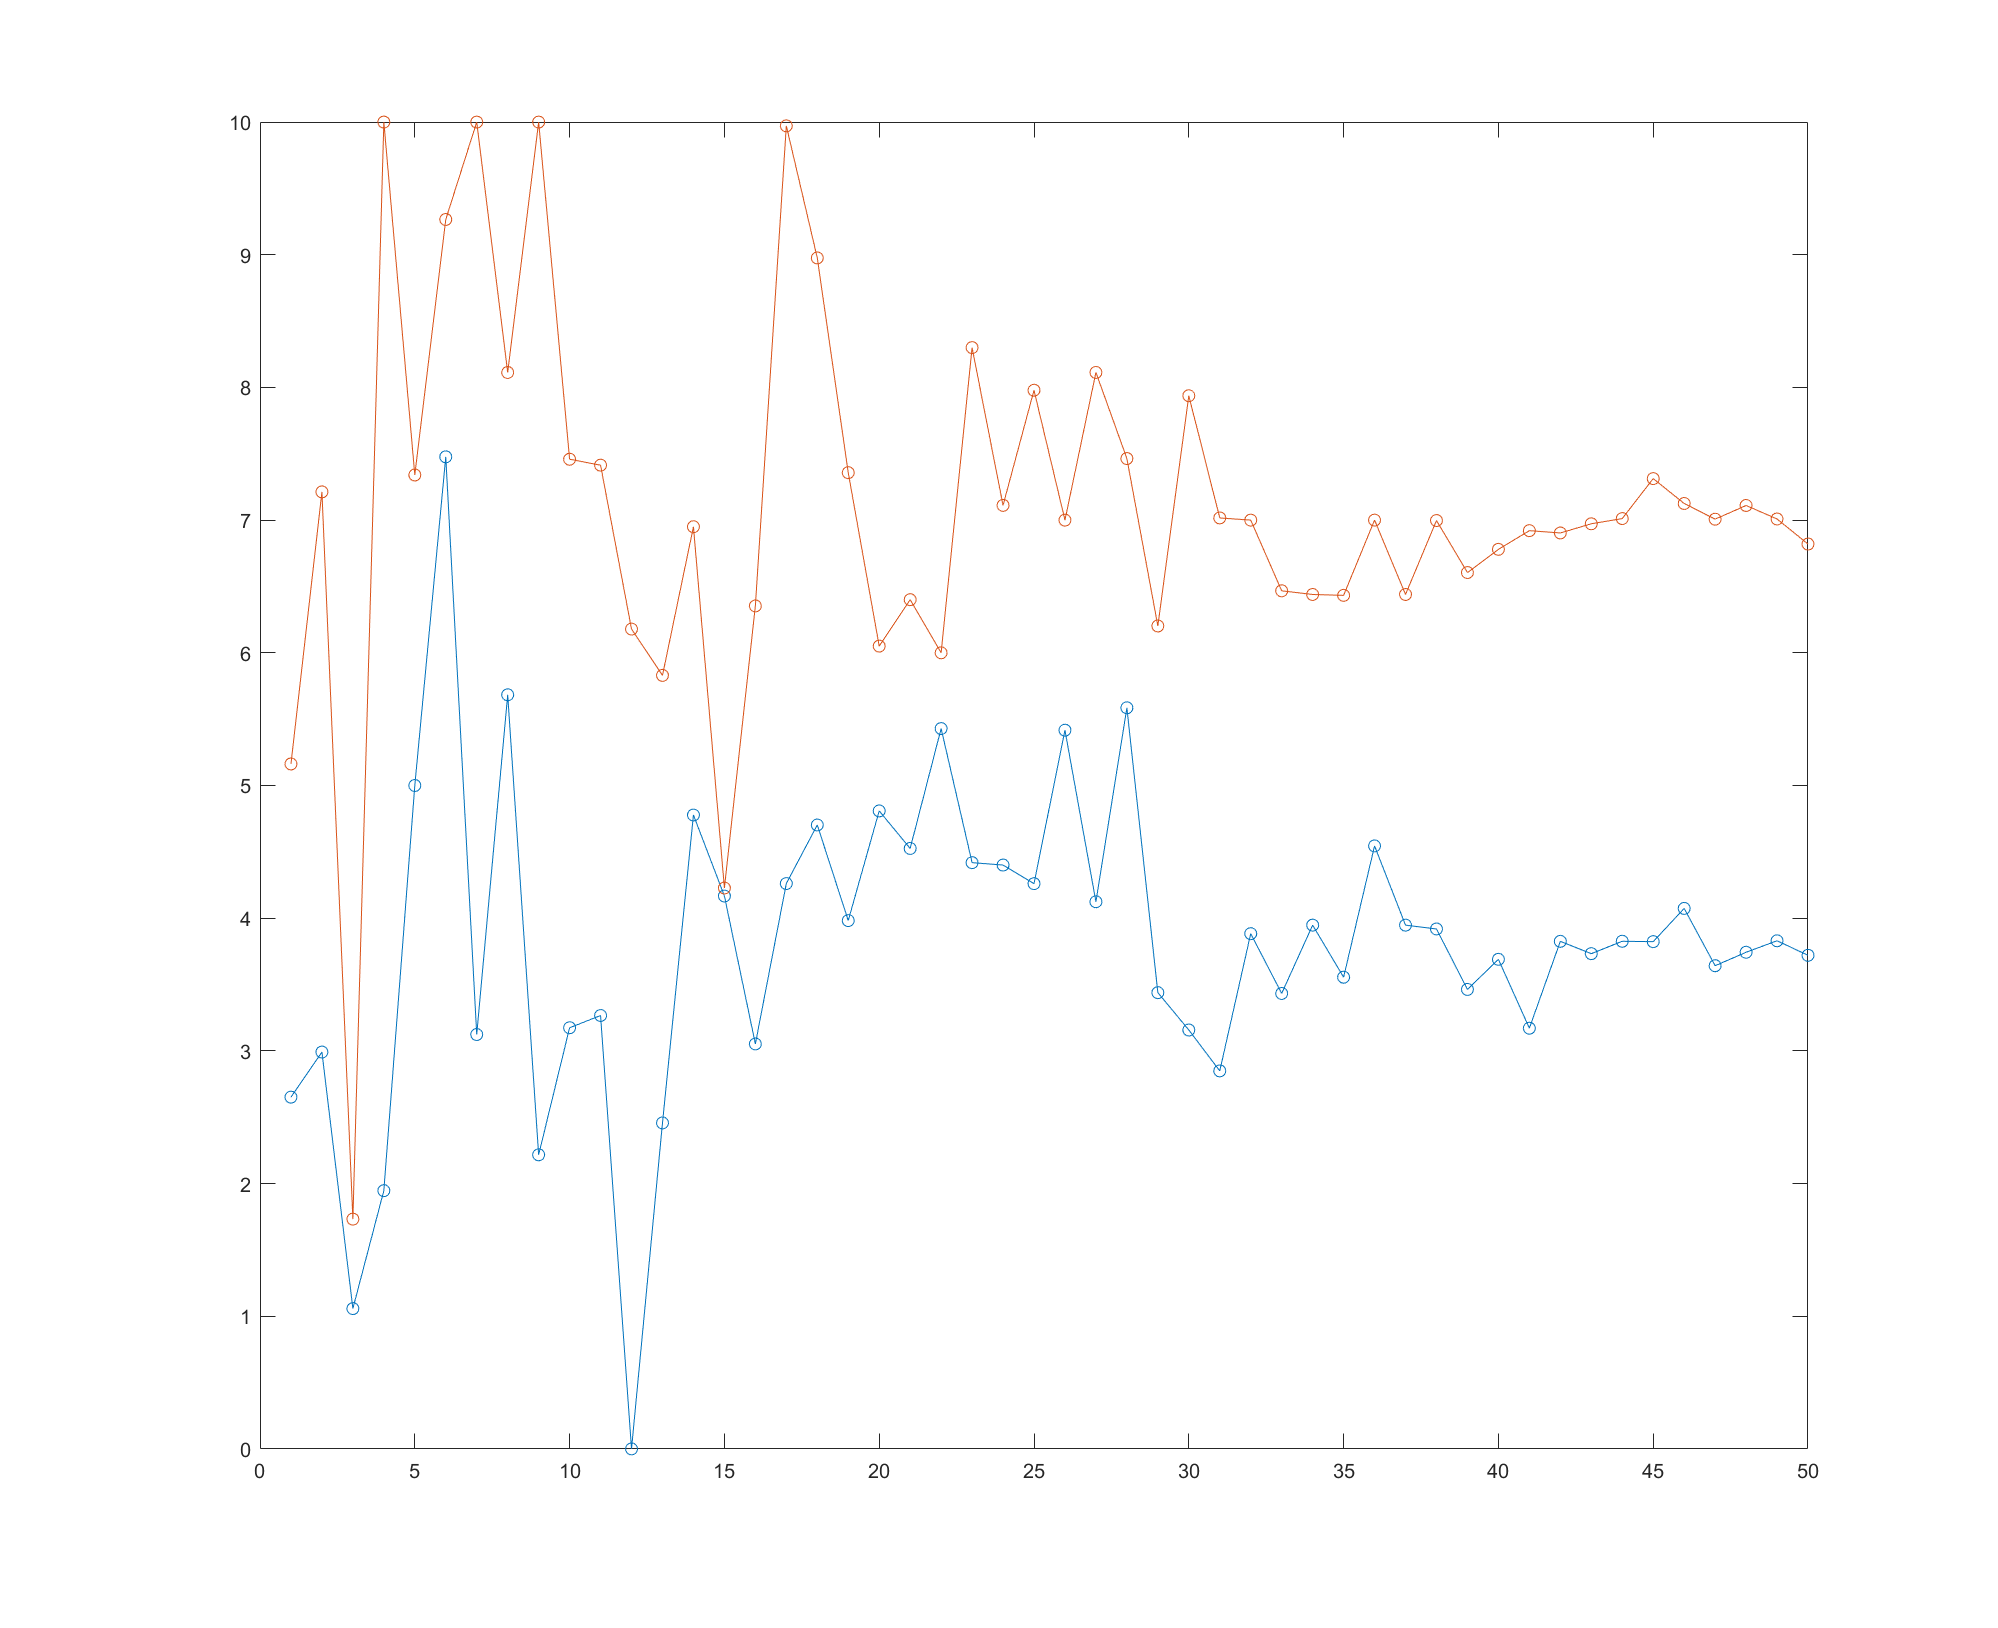

Above simulation took around 11 hours.

### Comments

From the simple simulation above, we could get an impression that the algorithm does work for searching the Bayesian optimal design for this model. The most annoying problem now is still the long time of computation. In Han's paper, those candidate designs they proposed all have 16 time points. If we want to find the Bayesian optimal design including 16 time points, a rough estimate is that we may need more than ten days to run the algorithm, which is quite expensive. 

It is possible to control the runtime. For instance, we used 10 hours to search the Bayesian optimal design with 16 time points. Compared to those candidate designs listed in Han's paper, the final design we obtained has a significantly higher efficiency.  If we define relative efficiency between two general designs $\mathbf{t}_1$ and $\mathbf{t}_2$ as 

$$RE = \frac{F_3(\mathbf{t}_1, \cdots)}{F_3(\mathbf{t}_2, \cdots)},$$

where $F_3$ is defined in last section. Then the eight candidate designs' REs compared to the design that CSO-MA found are 40%, 52%, 21%, 46%, 48%, 25%, 31% and 49%. However, we do not think a 10-hour calculation for this case is enough for the sampling distributions converging to the true distributions. Therefore, above REs may not be accurate. 

Moreover, from an optimization perspective, we skip to estimate the marginal distribution of $y$. From an analysis angle, this procedure might be crucial although it can significantly prolong the computation time.